# Gender Performance Scale as a Quantitative insight into Intracategorical Intersectionality

Scott Oatley (s2265605@ed.ac.uk)

## Abstract

The measurement of identity categories within survey questionnaires and other instruments is an integral concept of social stratification quantitative analysis. This paper adopts an intracategorical approach in a quantitative context for the measurement of identity. The intracategorical approach emphasises the intrinsic heterogeneity of identity concepts. This paper applies this lens of intersectionality to the quantitative realm by deconstructing gender in its typically binary designation through social surveys and produces a measure of gender performance that provides a metric operationalisation of gender expression. This measure facilitates analysis of those at the gender periphery – individuals whose unique gender performance would be otherwise swallowed up by the overall variance of a binary gender measure. Using wave 10 of the UKHLS, this paper constructs via a factor analysis a measure of gender performance. This measure provides a metric scale documenting the masculinising or feminising role an individual performs within society. This measure is ‘gender blind’ and the masculinising or feminising performance an individual can take is not bound by their gender designation. The scale distribution is mapped onto gender measures to explore the bimodal nature of gender performance across generations. Furthermore, this paper uses this performance measure alongside gender and other identity categorisations to assess its utility in statistical models assessing income inequality. Findings indicate that using solely a gender measure erases the unique and often powerful impact that performance has upon income inequality. This paper provides evidence that a performance measure, even after controlling for gender itself, provides utility in the social scientific investigation of income disparity, and that often, the substantive impact of gender performance is inaccurately captured by a gender measure. 

### Key Words

Gender, Scale, Gender Roles, Masculinity, Femininity, Intersectionality, intracategorical  

## Justification for Notebook

Providing a literate workflow of any scientific investigations should be a baseline requiste of empirical research. Publishing a Jupyter Notebook allows individuals to not only reproduce the empirical work held within, it also provides a robust justification for each step in the research process. This process promotes open-science practices and encourages others to do the same.

Encouraging others to openly look at ones work invites critique. These critiques are welcome. The hope of using Notebooks is to have a much more organic and engaging research process whereby the research does not simply end once a paper is published. Critical comments can and will be incorporated into this Notebook to further research practices.

By providing a literate workflow where research, theory, justification, and 'footnote' analysis are all recorded in one place. This notebook invites a widespread auideance, ranging from other academics, to interested stakeholders. Whilst the language used in this Notebook is one intended for an academic auidence, the workflow presented should be possible for anyone that reads the Notebook and takes a methodical step-by-step approach to its application.

### Using Stata 

As Jupyter is a language agnostic program, the use of language used for analysis is left up to the individual researcher. For this Notebook, Stata is employed for all statistical analysis. Stata is a proprietary software and researchers MUST have access to Stata in order to undertake data analyses within the Jupyter notebook. A primary goal of extending this analysis is to undertake it in a different non-properiatory software.

Using Stata requires enabling the use of the 'stata kernel' in Jupyter. The instructions for which have been outlined in meticulous details in Connelly and Gayle (2019). For the sake of promoting a consistent introduction base for Jupyter Notebooks, and in an attempt to avoid needless confusing rhetoric at the beginning of such Notebooks, their original instructions are pasted below. I thank them for their work in pioneering best practices in the use of Notebooks for social scientific analysis:

#### Using Stata via Magic Cells

The approach for this Notebook uses Stata via magic cells. This facility can be downloaded and installed from [this github repository](https://github.com/TiesdeKok/ipystata).

At the command prompt you need to type:

pip install ipystata

In a code cell before using Stata you must type:

import ipystata

and then run the cell.

Each cell will now be a Stata code cell as long as you start your syntax with:

%%stata

For example to get a summary of the variables in Stata the cell should include the following code:

%%stata
summarize

further information on using Stata via magic [is available here](https://dev-ii-seminar.readthedocs.io/en/latest/notebooks/Stata_in_jupyter.html).

### Table of Contents

- [Introduction](#Introduction)
- [Background](#Background)
- Data
- Methods
- Descriptive Statistics 
- Models
- Results
- Conclusions
- Notes
- Supplementary Materials
- References

## Introduction



## Background

## Data

### Preparation Programs 

Prior to any data analysis, Stata requires initialisation within the ipykernal. Following this, the dataset - the 10th wave of the UKHLS is cleaned and re-coded for appropriate analysis.

In [11]:
import stata_setup

stata_setup.config("/Applications/Stata", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2025
Serial number: 401809305318
  Licensed to: Scott oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


Prior to any simulation/analysis, some basic set up is required to save datasets and path folders. Three global paths are set and assigned to the raw datasets, the working datasets that have been manipulated and changed from their raw state, and finally any output in the form of tables and figures. 

In [14]:
%%stata

global rawdata"/Users/scottoatley/Documents/Stata Data and Do/Data/UKHLSBHPS/stata/stata13_se/ukhls_w10"

global workingdata"/Users/scottoatley/Documents/Stata Data and Do/Working Data"

global outputs"/Users/scottoatley/Documents/Stata Data and Do/Output"


. 
. global rawdata"/Users/scottoatley/Documents/Stata Data and Do/Data/UKHLSBHPS/
> stata/stata13_se/ukhls_w10"

. 
. global workingdata"/Users/scottoatley/Documents/Stata Data and Do/Working Dat
> a"

. 
. global outputs"/Users/scottoatley/Documents/Stata Data and Do/Output"

. 


After setting global file paths, the next step is to open the raw dataset set and recode and clean it into the working dataset for analysis. The 10th wave of UKHLS is merged with the 'xwave' dataset. This is done to gain access to some cross-wave derived variables - in particular the race variable. 

In [17]:
%%stata

cd "$rawdata"

use "j_indresp.dta"

merge 1:1 pidp using xwavedat.dta
    
drop _merge


. 
. cd "$rawdata"
/Users/scottoatley/Documents/Stata Data and Do/Data/UKHLSBHPS/stata/stata13_se/
> ukhls_w10

. 
. use "j_indresp.dta"
(Substantive data for responding adults (16+), incl. proxies)

. 
. merge 1:1 pidp using xwavedat.dta
(label pid already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                       116,945
        from master                         0  (_merge==1)
        from using                    116,945  (_merge==2)

    Matched                            34,319  (_merge==3)
    -----------------------------------------

.     
. drop _merge

. 


## Methods

## Descriptive Statistics

The dataset is now cleaned and recoded to include only variables required for the factor analysis as well as subsequent modeling. 

In [22]:
%%stata 

* Variables required for the factor analysis:
* Each 'couple function' is recoded into an ordinal categorical variable that assesses along traditional gender role lines the masculine/feminine (or neither) function of the individual    

codebook j_huboss j_hubuys j_hudiy j_hufrys j_huiron j_humops, compact

* Household financial decisions    
gen cash=.
replace cash=0 if j_huboss==3
replace cash=-1 if j_huboss==2
replace cash=1 if j_huboss==1

* Who does the grocery shopping
gen shop=.
replace shop=0 if j_hubuys==3
replace shop=-1 if j_hubuys==1
replace shop=1 if j_hubuys==2

* Who does the DIY jobs
gen diy=.
replace diy=0 if j_hudiy==3
replace diy=-1 if j_hudiy==2
replace diy=1 if j_hudiy==1

* Who does the cooking
gen cook=.
replace cook=0 if j_hufrys==3
replace cook=-1 if j_hufrys==1
replace cook=1 if j_hufrys==2

* Who does the washing/ironing
gen wash=.
replace wash=0 if j_huiron==3
replace wash=-1 if j_huiron==1
replace wash=1 if j_huiron==2

* Who does the cleaning
gen clean=.
replace clean=0 if j_humops==3
replace clean=-1 if j_humops==1
replace clean=1 if j_humops==2    


. 
. * Variables required for the factor analysis:
. * Each 'couple function' is recoded into an ordinal categorical variable that
>  assesses along traditional gender role lines the masculine/feminine (or neit
> her) function of the individual    
. 
. codebook j_huboss j_hubuys j_hudiy j_hufrys j_huiron j_humops, compact

Variable     Obs Unique       Mean  Min  Max  Label
-------------------------------------------------------------------------------
j_huboss   34319      9  -1.188904   -9   97  Household financial decisions
j_hubuys   34319     10  -1.402518   -9   97  Who does the grocery shopping ...
j_hudiy    34319     10   .3465427   -9   97  Who does the DIY jobs (couples)
j_hufrys   34319     10  -1.538069   -9   97  Who does the cooking (couples)
j_huiron   34319     10  -1.423089   -9   97  Who does the washing/ironing (...
j_humops   34319     10  -1.202046   -9   97  Who does the cleaning (couples)
------------------------------------------------------------------------

The next set of variables to be re-coded and cleaned relate to the subsequent modeling post-factor analysis. 

In [24]:
%%stata

* Net Labour Individual Income (Log Transformed)

summarize j_fimnlabnet_dv, detail

gen labincome=j_fimnlabnet_dv

replace labincome=. if labincome<0

summarize labincome, detail

gen logincome = log(labincome)

lab var logincome "Log Net Labour Income"

* Ethnicity

tab racel_dv

gen ethnic=.
replace ethnic=1 if(racel_dv==1)
replace ethnic=1 if(racel_dv==2)
replace ethnic=1 if(racel_dv==3)
replace ethnic=1 if(racel_dv==4)
replace ethnic=2 if(racel_dv==5)
replace ethnic=2 if(racel_dv==6)
replace ethnic=2 if(racel_dv==7)
replace ethnic=2 if(racel_dv==8)
replace ethnic=3 if(racel_dv==9)
replace ethnic=4 if(racel_dv==10)
replace ethnic=4 if(racel_dv==11)
replace ethnic=5 if(racel_dv==12)
replace ethnic=6 if(racel_dv==13)
replace ethnic=7 if(racel_dv==14)
replace ethnic=7 if(racel_dv==15)
replace ethnic=7 if(racel_dv==16)
replace ethnic=8 if(racel_dv==17)
replace ethnic=8 if(racel_dv==18)

label define ethnic_lbl 1"White" 2"Mixed/Multiple Ethnic Groups" 3"Indian" 4"Pakistani and Bangladeshi" 5"Chinese" 6"Any other Asian Background" 7"Black/African/Caribbean/Black British" 8"Other" 
label values ethnic ethnic_lbl

lab var ethnic "Ethnicity"

tab ethnic


* Current Social Class (NS-SEC)

gen nssec=j_jbnssec8_dv
replace nssec=. if nssec<0

label define nssec 1"1.1 Large employers and higher managerial and administrative occupations" 2"1.2 Higher professional occupations" 3"2 Lower managerial, administrative and professional occupations" 4"3 Intermediate occupations" 5"4 Small employers and own account workers" 6"5 Lower supervisory and technical occupations" 7"6 Semi-routine occupations" 8"7 Routine occupations"
lab val nssec nssec

lab var nssec "Current Social Class (NS-SEC)"

tab nssec

* Generations and Cohort Variables

gen generations=.
replace generations=1 if j_birthy>=1995 & j_birthy<=1999
replace generations=2 if j_birthy>=1980 & j_birthy<=1994
replace generations=3 if j_birthy>=1965 & j_birthy<=1979
replace generations=4 if j_birthy>=1946 & j_birthy<=1964
replace generations=5 if j_birthy>=1925 & j_birthy<=1945

lab def generations 1"Gen Z" 2"Millennials" 3"Gen X" 4"Baby Boomer" 5"Silent"
lab val generations generations

lab var generations "Generation"

tab generations


gen cohort=. 
replace cohort=1 if j_birthy>=1927 & j_birthy<=1949
replace cohort=2 if j_birthy>=1950 & j_birthy<=1959
replace cohort=3 if j_birthy>=1960 & j_birthy<=1969
replace cohort=4 if j_birthy>=1970 & j_birthy<=1979
replace cohort=5 if j_birthy>=1980 & j_birthy<=1989
replace cohort=6 if j_birthy>=1990 & j_birthy<=1999

lab def cohort 1"1927/1949" 2"1950/1959" 3"1960/1969" 4"1970/1979" 5"1980/1989" 6"1990/1999"
lab val cohort cohort

lab var cohort "Cohort"

tab cohort

* Sex

drop sex 
lab drop sex 

gen sex=.
replace sex=0 if j_sex==2
replace sex=1 if j_sex==1

lab def sex 0"Female" 1"Male"
lab val sex sex 

lab var sex "Sex"


* Age and Age2
* Age is centred based upon the grand central mean of the sample, these centred age is then used to produce the squared function of Age in Age2

gen age= j_dvage
replace age=. if age<0

mean age

egen agemean = mean(age)

gen age_cgm = age - agemean

lab var age_cgm "Age Centered at Grand Mean"

gen age2_cgm= age_cgm*age_cgm

lab var age2_cgm "Age Squared Centered at Grand Mean"

* Housework

summarize j_howlng, detail 

gen househours=j_howlng

replace househours=. if househours<0

lab var househours "Hours per week Spent on Housework"

summarize househours, detail 



. 
. * Net Labour Individual Income (Log Transformed)
. 
. summarize j_fimnlabnet_dv, detail

        amount income component 1: net labour income
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0       -3333.33
 5%            0       -1802.61
10%            0       -1028.75       Obs              34,319
25%            0        -916.67       Sum of wgt.      34,319

50%       528.88                      Mean           920.0224
                        Largest       Std. dev.      1142.421
75%      1549.61          10200
90%         2400          10800       Variance        1305126
95%      3041.56          10800       Skewness       1.590743
99%         5200          16500       Kurtosis       7.087739

. 
. gen labincome=j_fimnlabnet_dv
(116,945 missing values generated)

. 
. replace labincome=. if labincome<0
(32 real changes made, 32 to missing)

. 
. summarize labincome, detail

                          labincome
------

Finally, the sample is restricted to only those variables deemed a requirement for either the factor analysis or subsequent modeling. The final n=10,442. 

In [26]:
%%stata 

keep if !missing(cash, shop, diy, cook, wash, clean, logincome, sex, ethnic, nssec, generations, cohort, age_cgm, age2_cgm, househours)

keep cash shop diy cook wash clean sex ethnic nssec generations cohort age_cgm age2_cgm pidp strata psu j_indinui_xw logincome househours

count


. 
. keep if !missing(cash, shop, diy, cook, wash, clean, logincome, sex, ethnic, 
> nssec, generations, cohort, age_cgm, age2_cgm, househours)
(141,189 observations deleted)

. 
. keep cash shop diy cook wash clean sex ethnic nssec generations cohort age_cg
> m age2_cgm pidp strata psu j_indinui_xw logincome househours

. 
. count
  10,075

. 


### Factor Analysis

In [28]:
%%stata

corr cash shop diy cook wash clean

alpha cash shop diy cook wash clean, item 


. 
. corr cash shop diy cook wash clean
(obs=10,075)

             |     cash     shop      diy     cook     wash    clean
-------------+------------------------------------------------------
        cash |   1.0000
        shop |   0.0164   1.0000
         diy |   0.1365   0.3165   1.0000
        cook |   0.0926   0.5372   0.3198   1.0000
        wash |   0.0882   0.4285   0.4783   0.4481   1.0000
       clean |   0.0993   0.3865   0.3992   0.4365   0.6343   1.0000


. 
. alpha cash shop diy cook wash clean, item 

Test scale = mean(unstandardized items)

                                                            Average
                             Item-test     Item-rest       interitem
Item         |  Obs  Sign   correlation   correlation     covariance      alpha
-------------+-----------------------------------------------------------------
cash         | 10075   +       0.2595        0.1185        .3021508      0.7945
shop         | 10075   +       0.6939        0.5245        

In [29]:
%%stata

factor shop diy cook wash clean, pcf

rotate


. 
. factor shop diy cook wash clean, pcf
(obs=10,075)

Factor analysis/correlation                      Number of obs    =     10,075
    Method: principal-component factors          Retained factors =          1
    Rotation: (unrotated)                        Number of params =          5

    --------------------------------------------------------------------------
         Factor  |   Eigenvalue   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      2.76596      1.96611            0.5532       0.5532
        Factor2  |      0.79986      0.18025            0.1600       0.7132
        Factor3  |      0.61960      0.15959            0.1239       0.8371
        Factor4  |      0.46002      0.10546            0.0920       0.9291
        Factor5  |      0.35456            .            0.0709       1.0000
    --------------------------------------------------------------------------
    LR test:

Original factor analysis included "cash" which did not load well. This was re-run and taken out of subsequent factor loadings. 

In [32]:
%%stata

predict factor1

rename factor1 gender_performance

lab var gender_performance "Gender Performance"


. 
. predict factor1
(option regression assumed; regression scoring)

Scoring coefficients (method = regression; based on varimax rotated factors)

    ------------------------
        Variable |  Factor1 
    -------------+----------
            shop |  0.25744 
             diy |  0.23842 
            cook |  0.26642 
            wash |  0.29609 
           clean |  0.28244 
    ------------------------


. 
. rename factor1 gender_performance

. 
. lab var gender_performance "Gender Performance"

. 


In [33]:
%%stata

summarize gender_performance, detail

ttest gender_performance, by(sex)

corr gender_performance househours


. 
. summarize gender_performance, detail

                     Gender Performance
-------------------------------------------------------------
      Percentiles      Smallest
 1%    -1.581812      -1.581812
 5%    -1.581812      -1.581812
10%    -1.314622      -1.581812       Obs              10,075
25%    -.9071414      -1.581812       Sum of wgt.      10,075

50%     .0119728                      Mean           5.27e-09
                        Largest       Std. dev.             1
75%     .9474893       1.652703
90%     1.332223       1.652703       Variance              1
95%     1.652703       1.652703       Skewness       .0334424
99%     1.652703       1.652703       Kurtosis       1.816378

. 
. ttest gender_performance, by(sex)

Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf. interval]
---------+-------------------------------------------

In [34]:
%%stata

gen gender_performance_2 = gender_performance^2

lab var gender_performance_2 "Gender Performance Squared"

summarize gender_performance_2

cd"$workingdata"

save ukhlswave10_cra_so_v1, replace


. 
. gen gender_performance_2 = gender_performance^2

. 
. lab var gender_performance_2 "Gender Performance Squared"

. 
. summarize gender_performance_2

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
gender_per~2 |     10,075    .9999008    .9034915   3.01e-06   2.731427

. 
. cd"$workingdata"
/Users/scottoatley/Documents/Stata Data and Do/Working Data

. 
. save ukhlswave10_cra_so_v1, replace
file ukhlswave10_cra_so_v1.dta saved

. 


In [35]:
%%stata

grstyle clear
set scheme white_tableau
grstyle init
grstyle set legend 2, nobox
grstyle set legend, inside


. 
. grstyle clear

. set scheme white_tableau

. grstyle init

. grstyle set legend 2, nobox

. grstyle set legend, inside

. 



. 
. cd"$outputs"
/Users/scottoatley/Documents/Stata Data and Do/Output

. 
. twoway (kdensity gender_performance if sex == 0 & cohort==1, lcolor(blue) lpa
> ttern(solid)) ///
>        (kdensity gender_performance if sex == 1 & cohort==1, lcolor(red) lpat
> tern(dash)), ///
>        legend(off) ///
>        title("1990/1999", size(vsmall)) ///
>            ytitle("Kernal Density", size(vsmall)) ///
>            xtitle("", size(vsmall)) ///    
>        xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
>        ylabel(0(0.2)0.8, grid labsize(tiny)) ///           
>            note("n=578", size(vsmall)) ///
>            saving(gen1, replace)
file gen1.gph saved

. 
. twoway (kdensity gender_performance if sex == 0 & cohort==2, lcolor(blue) lpa
> ttern(solid)) ///
>        (kdensity gender_performance if sex == 1 & cohort==2, lcolor(red) lpat
> tern(dash)), ///
>        legend(off) ///
>        title("1980/1989", size(vsmall)) ///
>            ytitle("", size(vsmall)) ///    
>            xt

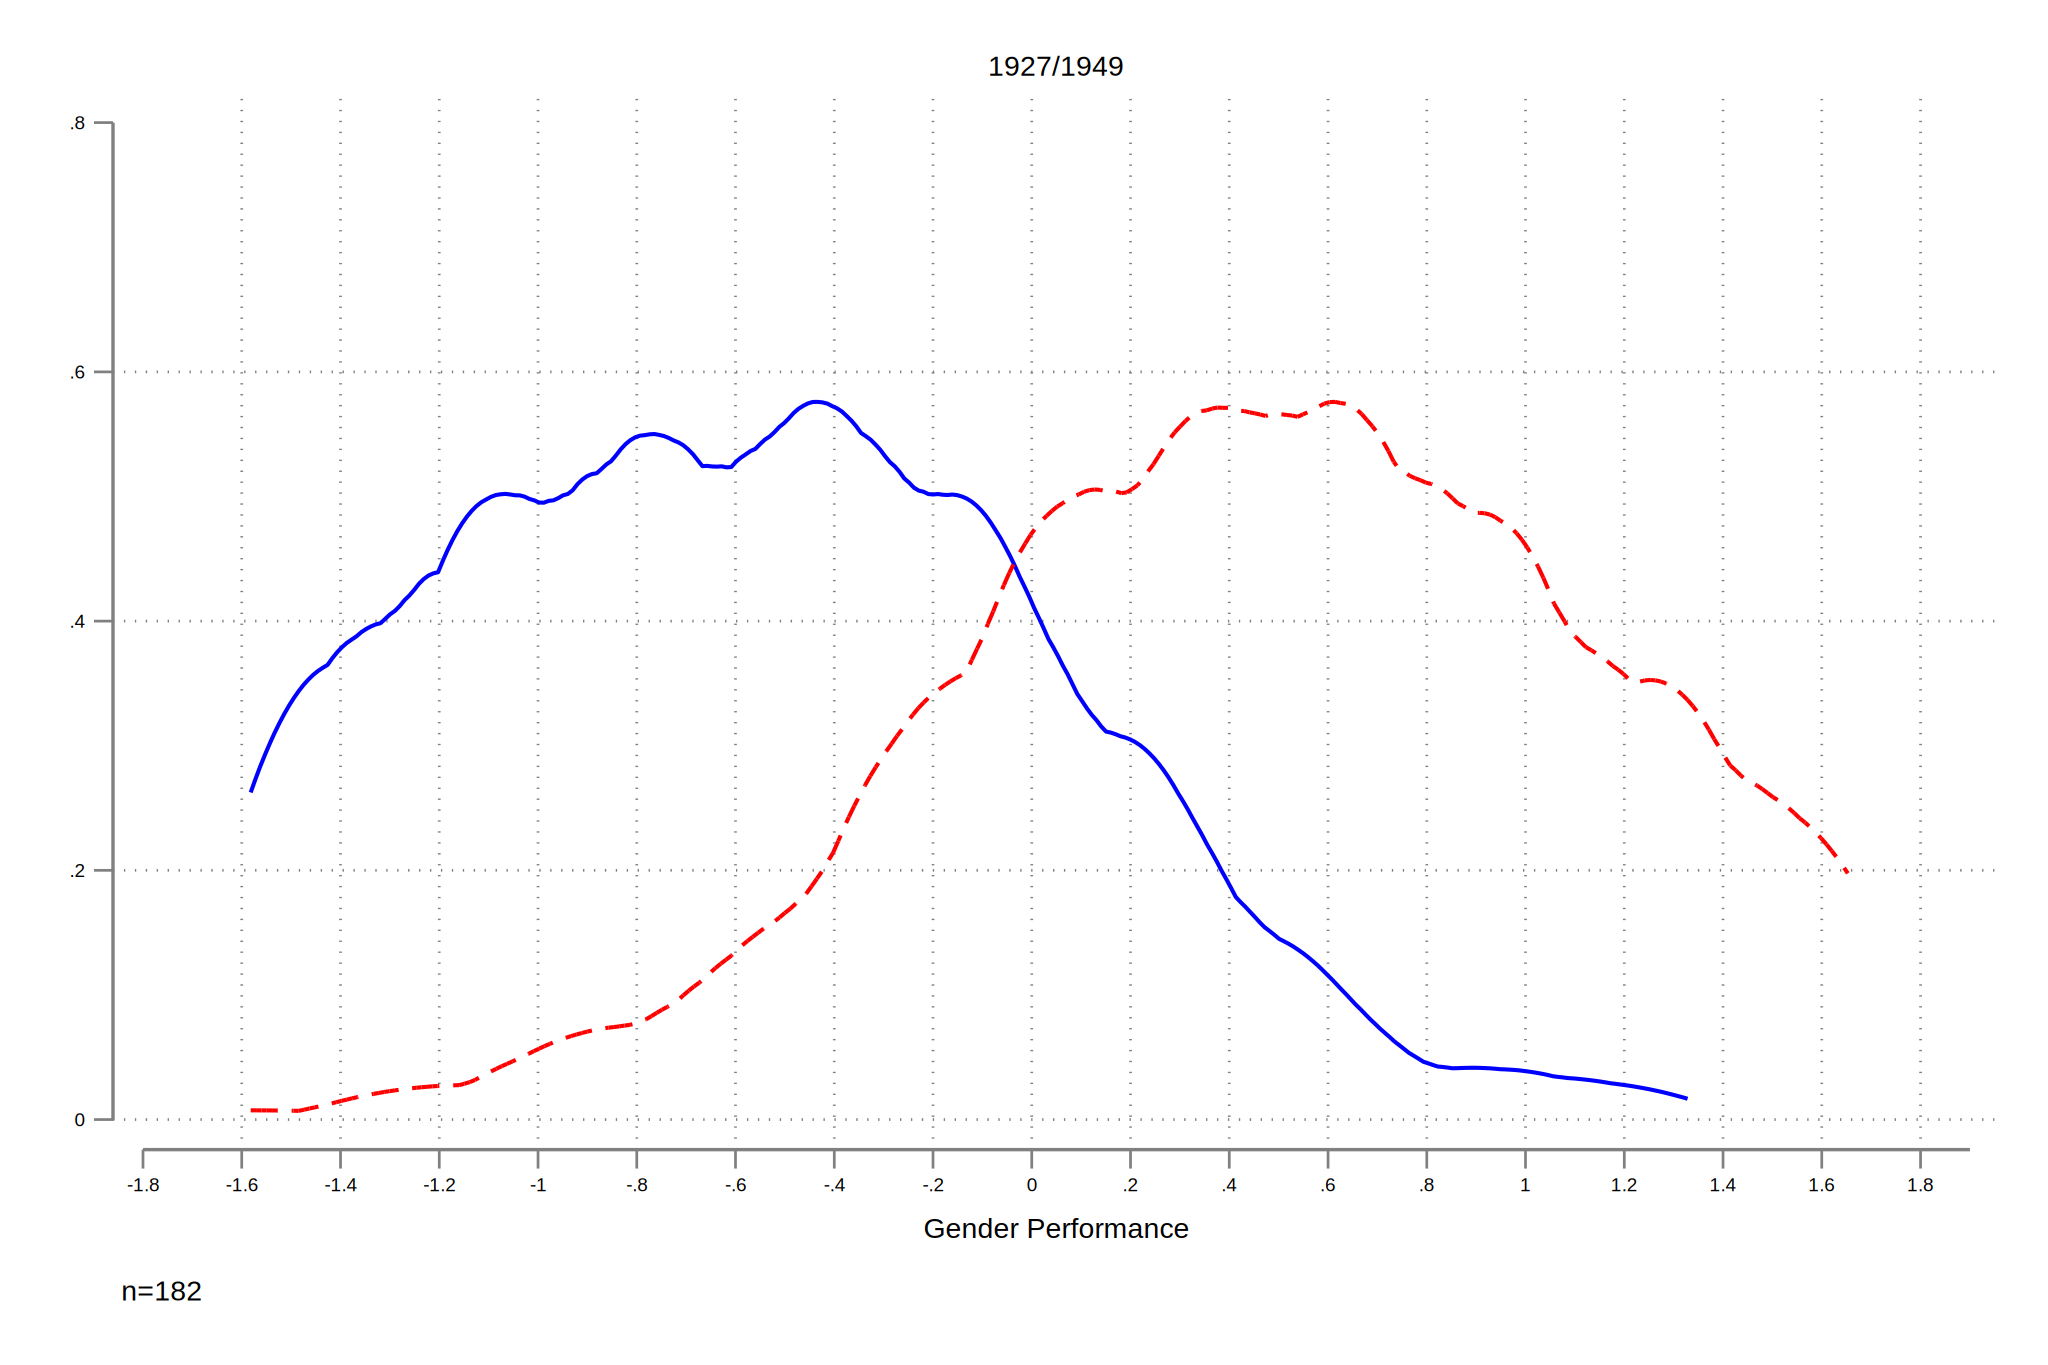

In [130]:
%%stata

cd"$outputs"

twoway (kdensity gender_performance if sex == 0 & cohort==1, lcolor(blue) lpattern(solid)) ///
       (kdensity gender_performance if sex == 1 & cohort==1, lcolor(red) lpattern(dash)), ///
       legend(off) ///
       title("1990/1999", size(vsmall)) ///
	   ytitle("Kernal Density", size(vsmall)) ///
	   xtitle("", size(vsmall)) ///	   
       xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
       ylabel(0(0.2)0.8, grid labsize(tiny)) ///	   
	   note("n=578", size(vsmall)) ///
	   saving(gen1, replace)

twoway (kdensity gender_performance if sex == 0 & cohort==2, lcolor(blue) lpattern(solid)) ///
       (kdensity gender_performance if sex == 1 & cohort==2, lcolor(red) lpattern(dash)), ///
       legend(off) ///
       title("1980/1989", size(vsmall)) ///
	   ytitle("", size(vsmall)) ///	   
	   xtitle("", size(vsmall)) ///	   	   
       xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
       ylabel(0(0.2)0.8, grid labsize(tiny)) ///	   
	   note("n=2,074", size(vsmall)) ///	   
	   saving(gen2, replace)
	   
twoway (kdensity gender_performance if sex == 0 & cohort==3, lcolor(blue) lpattern(solid)) ///
       (kdensity gender_performance if sex == 1 & cohort==3, lcolor(red) lpattern(dash)), ///
       title("1970/1979", size(vsmall)) ///
	   ytitle("", size(vsmall)) ///	   	   
	   xtitle("", size(vsmall)) ///	   	   
       xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
       ylabel(0(0.2)0.8, grid labsize(tiny)) ///	   
	   note("n=2,074", size(vsmall)) ///
       legend(label(1 "Female") label(2 "Male")) ///	   
	   saving(gen3, replace)
	   
twoway (kdensity gender_performance if sex == 0 & cohort==4, lcolor(blue) lpattern(solid)) ///
       (kdensity gender_performance if sex == 1 & cohort==4, lcolor(red) lpattern(dash)), ///
       legend(off) ///
       title("1960/1969", size(vsmall)) ///
	   ytitle("Kernal Density", size(vsmall)) ///
	   xtitle("Gender Performance", size(vsmall)) ///
       ylabel(0(0.2)0.8, grid labsize(tiny)) ///	   
       xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
	   note("n=3,008", size(vsmall)) ///	   	   
	   saving(gen4, replace)
	   
	   
twoway (kdensity gender_performance if sex == 0 & cohort==5, lcolor(blue) lpattern(solid)) ///
       (kdensity gender_performance if sex == 1 & cohort==5, lcolor(red) lpattern(dash)), ///
       legend(off) ///
       title("1950/1959", size(vsmall)) ///
	   ytitle("", size(vsmall)) ///	   	   
	   xtitle("Gender Performance", size(vsmall)) ///	   
       xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
       ylabel(0(0.2)0.8, grid labsize(tiny)) ///	   
	   note("n=1,313", size(vsmall)) ///	   	   
	   saving(gen5, replace)
	   
twoway (kdensity gender_performance if sex == 0 & cohort==6, lcolor(blue) lpattern(solid)) ///
       (kdensity gender_performance if sex == 1 & cohort==6, lcolor(red) lpattern(dash)), ///
       legend(off) ///
       title("1927/1949", size(vsmall)) ///
	   ytitle("", size(vsmall)) ///	   	   
	   xtitle("Gender Performance", size(vsmall)) ///	   
       xlabel(-1.8(0.2)1.9, grid labsize(tiny)) ///
       ylabel(0(0.2)0.8, grid labsize(tiny)) ///
	   note("n=182", size(vsmall)) ///	   	   
	   saving(gen6, replace)    



. 
. graph combine gen1.gph gen2.gph gen3.gph gen4.gph gen5.gph gen6.gph, ycommon 
> ///
> title("Distribution of Gender Performance Measure by Gender over Birth Cohort
> s", size(small)) ///
> subtitle("Illustration of the Bimodal Expression of Gender Performance", size
> (vsmall)) ///
> note("Data: UKHLS Wave 10, N=10,075", size(vsmall)) ///
> caption("Positive values associated with increasing levels of masculinity, ne
> gative values assoicated with increasing levels of femininity", size(vsmall))

. 
. graph export "perfgen.png", width(2000) replace
file perfgen.png written in PNG format

. 


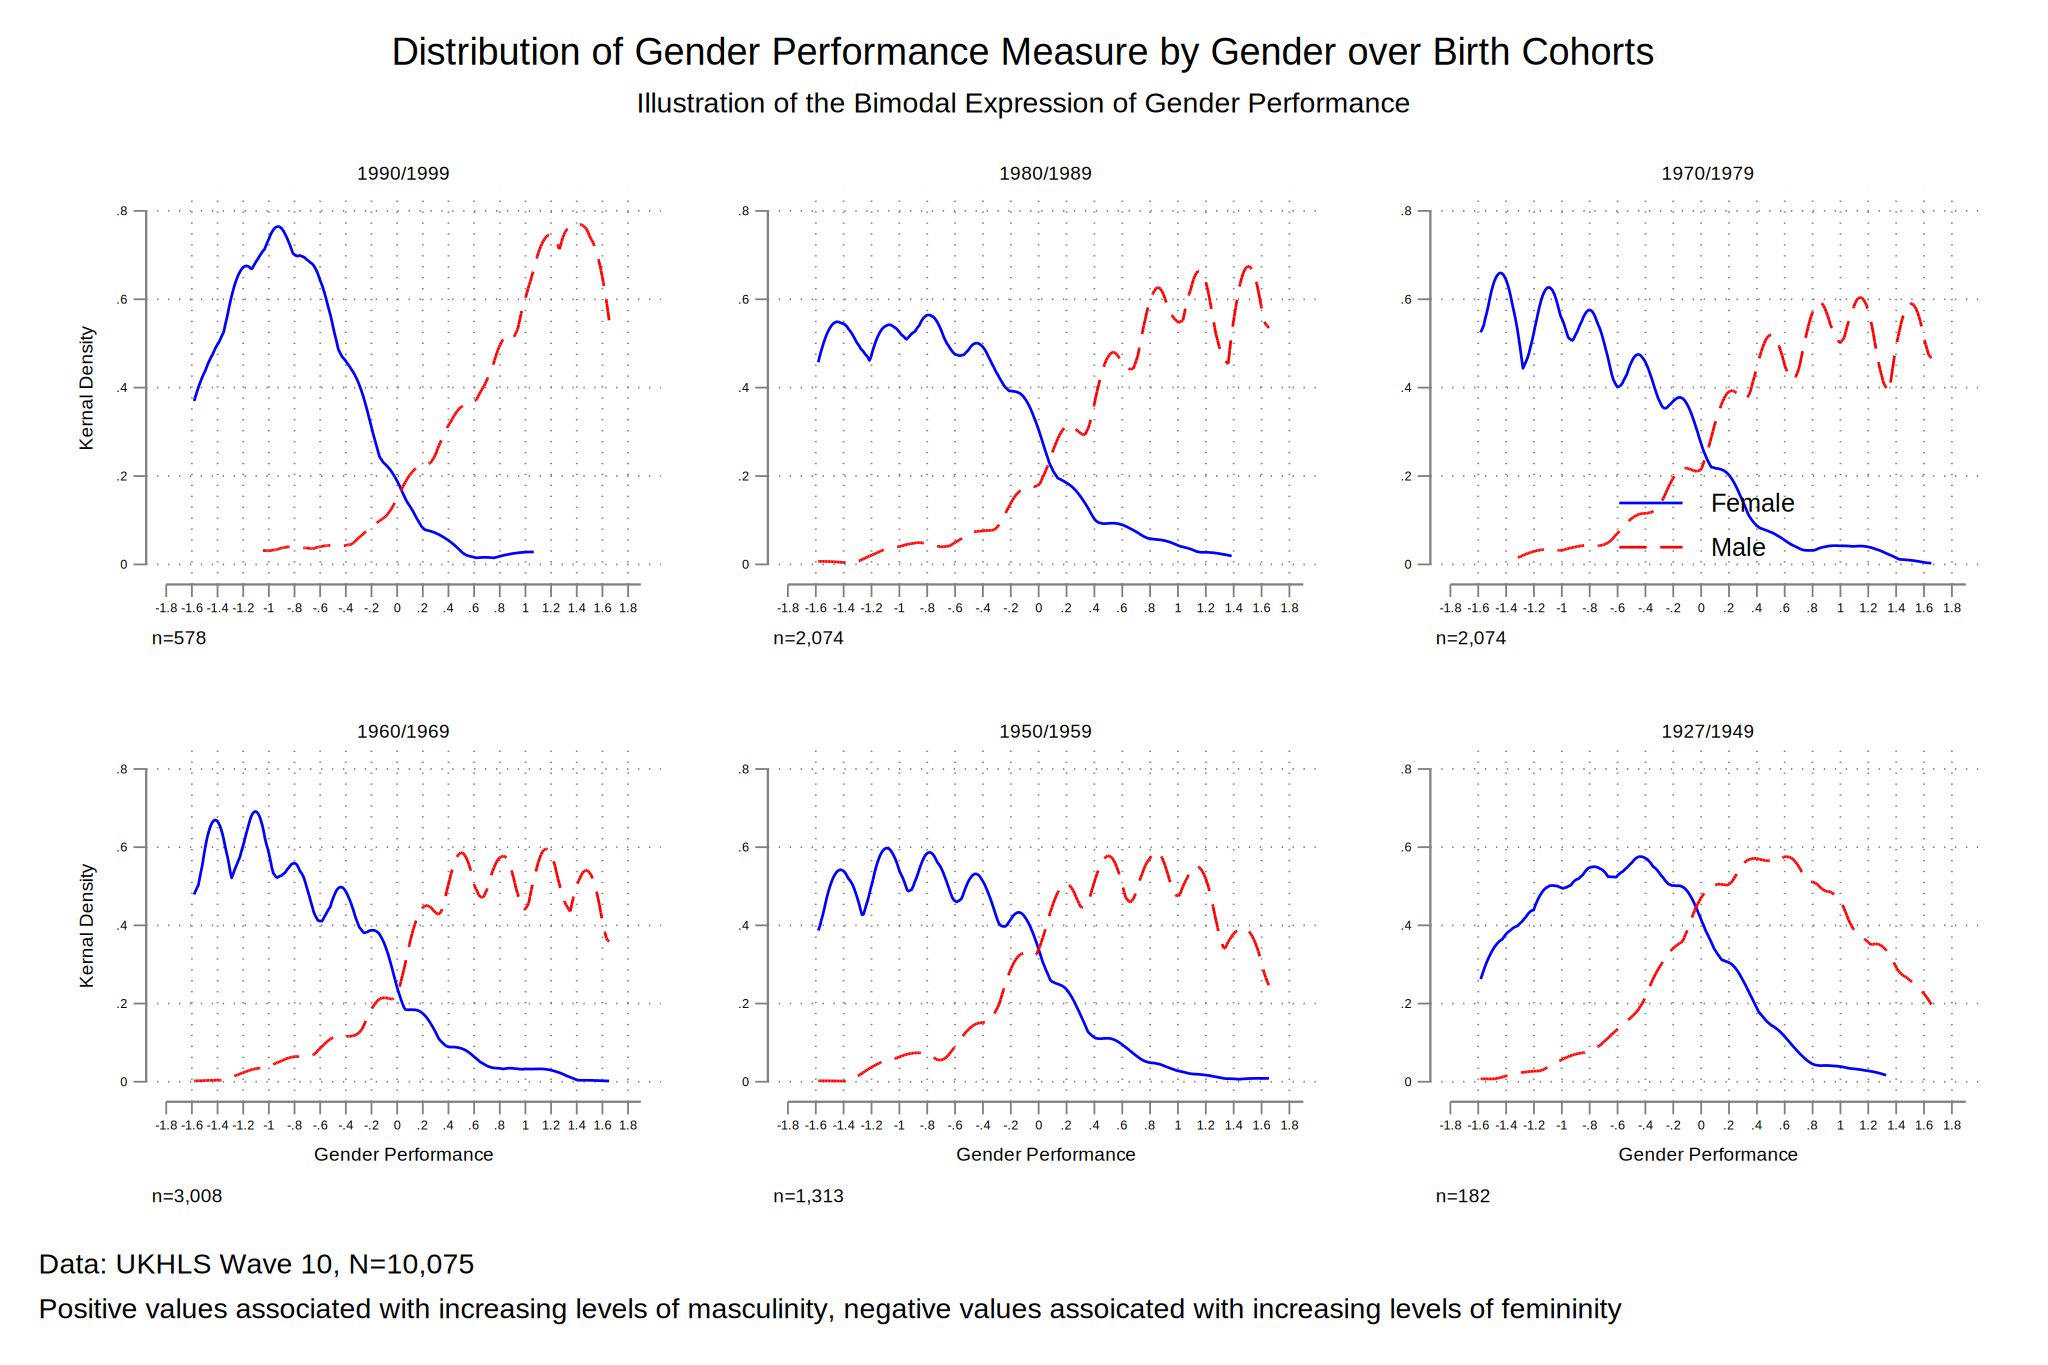

In [132]:
%%stata

graph combine gen1.gph gen2.gph gen3.gph gen4.gph gen5.gph gen6.gph, ycommon ///
title("Distribution of Gender Performance Measure by Gender over Birth Cohorts", size(small)) ///
subtitle("Illustration of the Bimodal Expression of Gender Performance", size(vsmall)) ///
note("Data: UKHLS Wave 10, N=10,075", size(vsmall)) ///
caption("Positive values associated with increasing levels of masculinity, negative values assoicated with increasing levels of femininity", size(vsmall))

graph export "perfgen.png", width(2000) replace


In [46]:
%%stata 

collect clear

table (var) (), statistic(fvfrequency sex ethnic nssec) ///
					statistic(fvpercent sex ethnic nssec) ///
					statistic(mean logincome age_cgm age2_cgm gender_performance gender_performance_2 househours) ///  
					statistic(sd logincome age_cgm age2_cgm gender_performance gender_performance_2 househours) 			
collect remap result[fvfrequency mean] = Col[1 1] 
	collect remap result[fvpercent sd] = Col[2 2]
collect get resname = "Mean", tag(Col[1] var[mylabel]) 
	collect get resname = "SD", tag(Col[2] var[mylabel])
collect get empty = "  ", tag(Col[1] var[empty]) 
	collect get empty = "  ", tag(Col[2] var[empty])
    
count
	collect get n = `r(N)', tag(Col[2] var[n])
	
collect layout (var[0.sex 1.sex ///
					1.ethnic 2.ethnic 3.ethnic 4.ethnic 5.ethnic 6.ethnic 7.ethnic 8.ethnic ///
					1.nssec 2.nssec 3.nssec 4.nssec 5.nssec 6.nssec 7.nssec 8.nssec ///
					empty mylabel ///
					logincome ///
                    age_cgm ///
                    age2_cgm ///
                    gender_performance /// 
                    gender_performance_2 ///
                    househours ///
					empty n]) (Col[1 2])

collect label levels Col 1 "n" 2 "%"			
collect style header Col, title(hide)
collect style header var[empty mylabel], level(hide)
collect style row stack, nobinder
collect style cell var [sex ethnic nssec]#Col[1], nformat(%6.0fc) 
collect style cell var[sex ethnic nssec]#Col[2], nformat(%6.2f) sformat("%s%%") 	
collect style cell var[logincome age_cgm age2_cgm gender_performance gender_performance_2 househours], nformat(%6.2f)
collect style cell border_block[item row-header], border(top, pattern(nil)) 
collect title "Table 1: Descriptive Statistics for Gender Performance Model"
collect note "Data Source: Wave 10 UKHLS"
collect preview

collect export "Table1.docx", replace


. 
. collect clear

. 
. table (var) (), statistic(fvfrequency sex ethnic nssec) ///
>                                         statistic(fvpercent sex ethnic nssec)
>  ///
>                                         statistic(mean logincome age_cgm age2
> _cgm gender_performance gender_performance_2 househours) ///  
>                                         statistic(sd logincome age_cgm age2_c
> gm gender_performance gender_performance_2 househours)                     

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                       |  Factor-variable frequency   Factor-variable percent        Mean   Standard deviation
-------------------------------------------------------------------------------------------------------+-------------------------------------

## Models

Before any formal modeling can take place, the UKHLS is a complex social survey. This means appropriate adjustments for its complex survey design are required. 

In [50]:
%%stata 

save "$workingdata/gender.dta", replace

svyset psu [pweight=j_indinui_xw], strata(strata) single(scaled)

svy: regress logincome i.sex gender_performance gender_performance_2 c.age_cgm c.age2_cgm i.ethnic i.nssec 



. 
. save "$workingdata/gender.dta", replace
file /Users/scottoatley/Documents/Stata Data and Do/Working Data/gender.dta
    saved

. 
. svyset psu [pweight=j_indinui_xw], strata(strata) single(scaled)

Sampling weights: j_indinui_xw
             VCE: linearized
     Single unit: scaled
        Strata 1: strata
 Sampling unit 1: psu
           FPC 1: <zero>

. 
. svy: regress logincome i.sex gender_performance gender_performance_2 c.age_cg
> m c.age2_cgm i.ethnic i.nssec 
(running regress on estimation sample)

Survey: Linear regression

Number of strata = 1,630                          Number of obs   =     10,060
Number of PSUs   = 3,409                          Population size = 9,295.5002
                                                  Design df       =      1,779
                                                  F(19, 1761)     =     156.96
                                                  Prob > F        =     0.0000
                                                  R-squared 

In [51]:
%%stata

save "$workingdata/TEMPFILE.dta", replace


* Need to install fre ado file first.	
	bysort strata psu: keep if _n==1
	bysort strata: generate n_psu = _N
	fre n_psu
	list pidp strata psu if n_psu==1
	
	* Advice from Longhi and Nandi is to merge the strata with the adjacent ones.
	
	bysort strata: keep if _n==1
	sort strata
	generate newstrata =strata[_n+1] if n_psu==1
	fre newstrata
	list pidp strata psu newstrata if n_psu==1
	keep if n_psu==1
	keep strata newstrata n_psu
	merge 1:m strata using "$workingdata/gender.dta"
	fre n_psu
	replace strata = newstrata if n_psu==1
	drop _merge
	
svyset psu [pweight=j_indinui_xw], strata(strata) single(scaled)
svy: regress logincome i.sex gender_performance gender_performance_2 c.age_cgm c.age2_cgm i.ethnic i.nssec 



. 
. save "$workingdata/TEMPFILE.dta", replace
file /Users/scottoatley/Documents/Stata Data and Do/Working Data/TEMPFILE.dta
    saved

. 
. 
. * Need to install fre ado file first.   
.         bysort strata psu: keep if _n==1
(6,652 observations deleted)

.         bysort strata: generate n_psu = _N

.         fre n_psu

n_psu
-----------------------------------------------------------
              |      Freq.    Percent      Valid       Cum.
--------------+--------------------------------------------
Valid   1     |        599      17.50      17.50      17.50
        2     |       1812      52.94      52.94      70.44
        3     |        282       8.24       8.24      78.67
        4     |         96       2.80       2.80      81.48
        5     |         40       1.17       1.17      82.65
        7     |         28       0.82       0.82      83.46
        8     |         16       0.47       0.47      83.93
        17    |         17       0.50       0.50      84.43
        

In [52]:
%%stata

save "$workingdata/TEMPFILE.dta", replace

	bysort strata psu: keep if _n==1
	bysort strata: generate n_psu2 = _N
	fre n_psu2
	list pidp strata psu if n_psu2==1
	
	bysort strata: keep if _n==1
	sort strata
	generate newstrata2 =strata[_n+1] if n_psu2==1
	fre newstrata2
	list pidp strata psu newstrata2 if n_psu2==1
	keep if n_psu2==1
	keep strata newstrata2 n_psu2
	merge 1:m strata using "$workingdata/TEMPFILE.dta"
	drop _merge
	fre n_psu2
	replace strata = newstrata2 if n_psu2==1
	
svyset psu [pweight=j_indinui_xw], strata(strata) single(scaled)
svy: regress logincome i.sex gender_performance gender_performance_2 c.age_cgm c.age2_cgm i.ethnic i.nssec 



. 
. save "$workingdata/TEMPFILE.dta", replace
file /Users/scottoatley/Documents/Stata Data and Do/Working Data/TEMPFILE.dta
    saved

. 
.         bysort strata psu: keep if _n==1
(6,652 observations deleted)

.         bysort strata: generate n_psu2 = _N

.         fre n_psu2

n_psu2
-----------------------------------------------------------
              |      Freq.    Percent      Valid       Cum.
--------------+--------------------------------------------
Valid   1     |        260       7.60       7.60       7.60
        2     |       1194      34.88      34.88      42.48
        3     |       1146      33.48      33.48      75.96
        4     |        160       4.67       4.67      80.63
        5     |         50       1.46       1.46      82.09
        6     |         18       0.53       0.53      82.62
        7     |         28       0.82       0.82      83.44
        8     |         16       0.47       0.47      83.90
        18    |         18       0.53       0.53   

In [53]:
%%stata

save "$workingdata/TEMPFILE.dta", replace

	bysort strata psu: keep if _n==1
	bysort strata: generate n_psu3 = _N
	fre n_psu3
	list pidp strata psu if n_psu3==1
	
	bysort strata: keep if _n==1
	sort strata
	generate newstrata3 =strata[_n+1] if n_psu3==1
	fre newstrata3
	list pidp strata psu newstrata3 if n_psu3==1
	keep if n_psu3==1
	keep strata newstrata3 n_psu3
	merge 1:m strata using "$workingdata/TEMPFILE.dta"
	drop _merge
	fre n_psu3
	replace strata = newstrata3 if n_psu3==1
	
svyset psu [pweight=j_indinui_xw], strata(strata) single(scaled)
svy: regress logincome i.sex gender_performance gender_performance_2 c.age_cgm c.age2_cgm i.ethnic i.nssec 



. 
. save "$workingdata/TEMPFILE.dta", replace
file /Users/scottoatley/Documents/Stata Data and Do/Working Data/TEMPFILE.dta
    saved

. 
.         bysort strata psu: keep if _n==1
(6,652 observations deleted)

.         bysort strata: generate n_psu3 = _N

.         fre n_psu3

n_psu3
-----------------------------------------------------------
              |      Freq.    Percent      Valid       Cum.
--------------+--------------------------------------------
Valid   1     |        125       3.65       3.65       3.65
        2     |       1194      34.88      34.88      38.53
        3     |        786      22.96      22.96      61.50
        4     |        604      17.65      17.65      79.14
        5     |         75       2.19       2.19      81.33
        6     |         36       1.05       1.05      82.38
        7     |         35       1.02       1.02      83.41
        8     |         16       0.47       0.47      83.87
        19    |         19       0.56       0.56   

In [55]:
%%stata

save "$workingdata/TEMPFILE.dta", replace

	bysort strata psu: keep if _n==1
	bysort strata: generate n_psu4 = _N
	fre n_psu4
	list pidp strata psu if n_psu4==1
	
	bysort strata: keep if _n==1
	sort strata
	generate newstrata4 =strata[_n+1] if n_psu4==1
	fre newstrata4
	list pidp strata psu newstrata4 if n_psu4==1
	keep if n_psu4==1
	keep strata newstrata4 n_psu4
	merge 1:m strata using "$workingdata/TEMPFILE.dta"
	drop _merge
	fre n_psu4
	replace strata = newstrata4 if n_psu4==1
	
svyset psu [pweight=j_indinui_xw], strata(strata) single(scaled)
svy: regress logincome i.sex gender_performance gender_performance_2 c.age_cgm c.age2_cgm i.ethnic i.nssec 



. 
. save "$workingdata/TEMPFILE.dta", replace
file /Users/scottoatley/Documents/Stata Data and Do/Working Data/TEMPFILE.dta
    saved

. 
.         bysort strata psu: keep if _n==1
(6,652 observations deleted)

.         bysort strata: generate n_psu4 = _N

.         fre n_psu4

n_psu4
-----------------------------------------------------------
              |      Freq.    Percent      Valid       Cum.
--------------+--------------------------------------------
Valid   1     |         65       1.90       1.90       1.90
        2     |       1194      34.88      34.88      36.78
        3     |        786      22.96      22.96      59.74
        4     |        380      11.10      11.10      70.84
        5     |        335       9.79       9.79      80.63
        6     |         60       1.75       1.75      82.38
        7     |         35       1.02       1.02      83.41
        8     |         16       0.47       0.47      83.87
        19    |         19       0.56       0.56   

### Analytical Models

In [63]:
%%stata

cd"$outputs"

regress logincome i.sex c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 
etable

svy: regress logincome i.sex c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 
etable, append 

regress logincome i.sex c.gender_performance c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 
etable, append 

svy: regress logincome i.sex c.gender_performance c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 
etable, append 

regress logincome i.sex c.gender_performance c.gender_performance_2 c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 
etable, append

svy: regress logincome i.sex c.gender_performance c.gender_performance_2 c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 
etable, append 

collect style showbase all

collect label levels etable_depvar 1 "OLS Regression (Gender Only)" ///
										2 "SVY OLS Regression (Gender Only)" ///
										3 "OLS Regression (Gender + Performance)" ///
										4 "SVY OLS Regression (Gender + Performance)" ///
                                        5 "OLS Regression (Performance Squared)" ///
                                        6 "SVY OLS Regression (Performance Squared)", modify

collect style cell, font(Book Antiqua)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 1.4: Regression Models of relationship between gender and performance on log income") ///
		titlestyles(font(Times New Roman, size(10) bold)) ///
		note("Data Source: UKHLS Wave 10. Adjusted for Complex Sample. n=10,307") ///
		notestyles(font(Times New Roman, size(8) italic)) ///
		export("incomegendermodels.docx", replace)


. 
. cd"$outputs"
/Users/scottoatley/Documents/Stata Data and Do/Output

. 
. regress logincome i.sex c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 

      Source |       SS           df       MS      Number of obs   =    10,075
-------------+----------------------------------   F(18, 10056)    =    246.92
       Model |  1892.48612        18  105.138118   Prob > F        =    0.0000
    Residual |  4281.87957    10,056  .425803458   R-squared       =    0.3065
-------------+----------------------------------   Adj R-squared   =    0.3053
       Total |  6174.36569    10,074  .612901101   Root MSE        =    .65254

------------------------------------------------------------------------------
   logincome | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   .3319267   .0147849    22.45   0.000     .3029454    .3609081
  househours |  -.0105026   .0009589  

In [65]:
eee

NameError: name 'eee' is not defined


. 
. svy: regress logincome i.sex c.gender_performance c.gender_performance_2 c.ho
> usehours c.age_cgm c.age2_cgm i.ethnic i.nssec 
(running regress on estimation sample)

Survey: Linear regression

Number of strata = 1,074                          Number of obs   =     10,075
Number of PSUs   = 3,423                          Population size = 9,295.5002
                                                  Design df       =      2,349
                                                  F(20, 2330)     =     194.89
                                                  Prob > F        =     0.0000
                                                  R-squared       =     0.3206

------------------------------------------------------------------------------
             |             Linearized
   logincome | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   .2659332   .02501

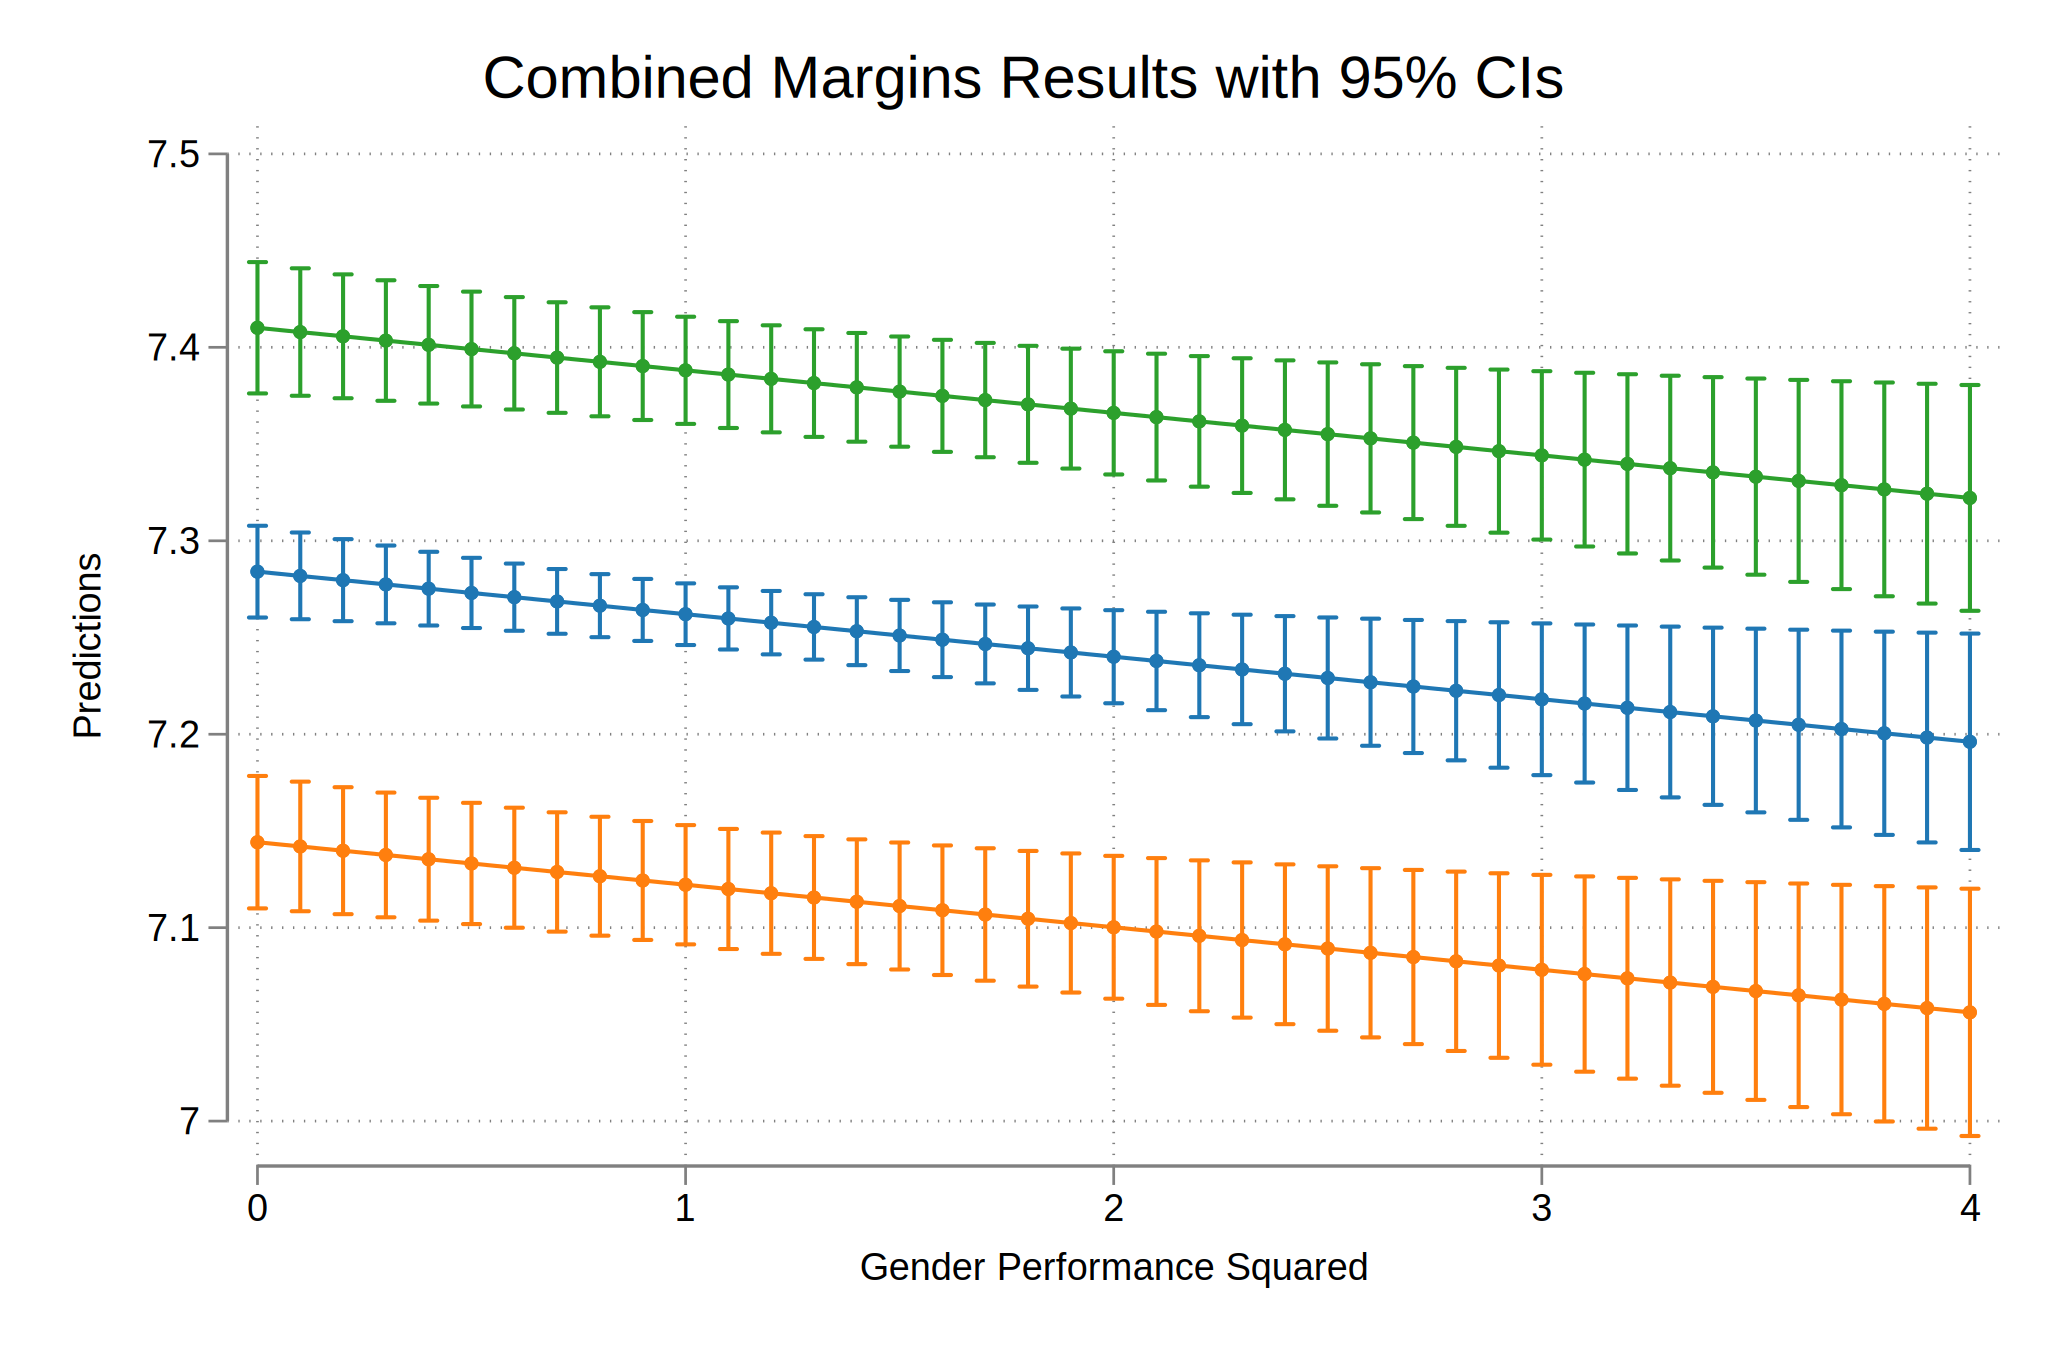

In [126]:
%%stata 

svy: regress logincome i.sex c.gender_performance c.gender_performance_2 c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 

margins sex, atmeans saving(margins3one, replace)
marginsplot, recast(scatter) ///
    plotopts(mcolor(dknavy)) ///
    title("Margins by Sex") ///
    saving(margins3one, replace)


margins, at(gender_performance=(-2(0.1)2)) atmeans saving(margins3two, replace) 
marginsplot, recast(line) recastci(rarea) saving(margins3two, replace) 

margins sex, at(gender_performance=(-2(0.1)2)) saving(margins3three, replace)
marginsplot, recast(line) recastci(rarea) saving(margins3three, replace) 

combomarginsplot margins3two margins3three, ///
    recast(line) recastci(rarea) ///
    title("Margins of Gender Performance by Sex") ///
    saving(margins2comb, replace) ///
    legend(order(1 "GP" 2 "GP Female" 3 "GP Male") ring(0) pos(11)) ///
    plot1opts(lcolor(eltblue)) ///
    plot2opts(lcolor(dknavy)) ///
    plot3opts(lcolor(emerald)) ///
    ci1opts(color(eltblue%30)) ///
    ci2opts(color(dknavy%30)) ///
    ci3opts(color(emerald%30))




margins, at(gender_performance_2=(0(0.1)4)) atmeans saving(margins3four, replace)
marginsplot, saving(margins3four, replace)

margins sex, at(gender_performance_2=(0(0.1)4)) saving(margins3five, replace)
marginsplot, saving(margins3five, replace)

combomarginsplot margins3four margins3five, saving(margins2comb2, replace) legend(off)


. 
. graph combine margins3one.gph margins2comb.gph, ycommon saving(marginsmodel3,
>  replace)
file marginsmodel3.gph saved

. graph export "Margins.png", width(2000) replace
(file Margins.png not found)
file Margins.png written in PNG format

. 


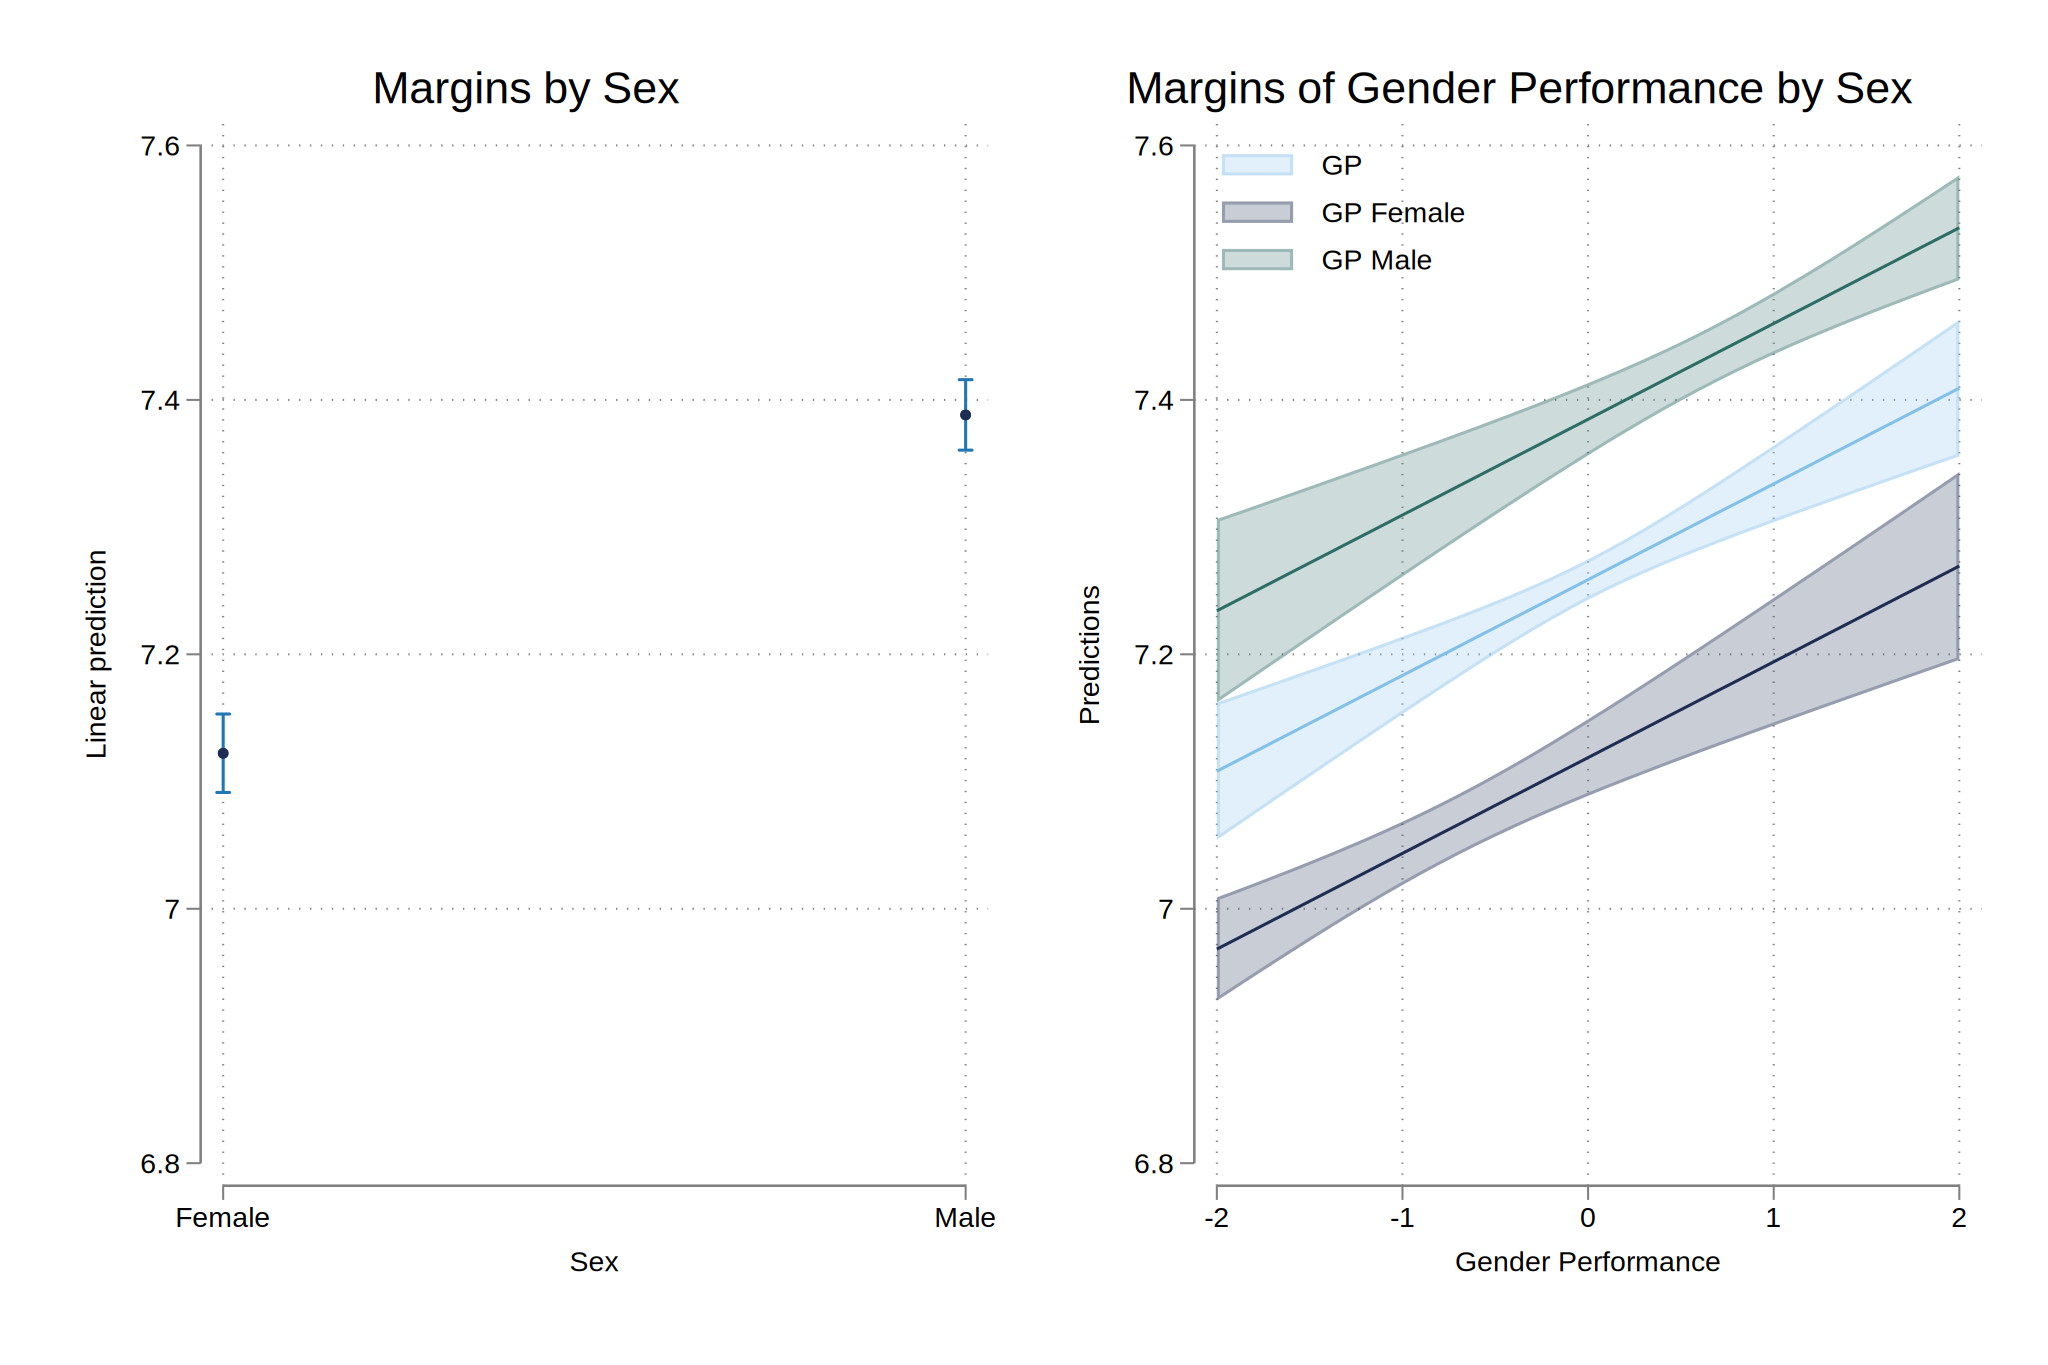

In [127]:
%%stata

graph combine margins3one.gph margins2comb.gph, ycommon saving(marginsmodel3, replace)
graph export "Margins.png", width(2000) replace

### Model Diagnostics

In [75]:
%%stata

regress logincome i.sex c.gender_performance c.gender_performance_2 c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 

vif

predict residuals, residuals 


. 
. regress logincome i.sex c.gender_performance c.gender_performance_2 c.househo
> urs c.age_cgm c.age2_cgm i.ethnic i.nssec 

      Source |       SS           df       MS      Number of obs   =    10,075
-------------+----------------------------------   F(20, 10054)    =    225.47
       Model |  1911.83708        20   95.591854   Prob > F        =    0.0000
    Residual |  4262.52861    10,054  .423963458   R-squared       =    0.3096
-------------+----------------------------------   Adj R-squared   =    0.3083
       Total |  6174.36569    10,074  .612901101   Root MSE        =    .65112

------------------------------------------------------------------------------
   logincome | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   .2537441   .0203492    12.47   0.000     .2138556    .2936325
gender_per~e |   .0582717   .0106844     5.45   0.000     .03732


. 
. svy: regress logincome i.sex c.gender_performance c.gender_performance_2 c.ho
> usehours c.age_cgm c.age2_cgm i.ethnic i.nssec 
(running regress on estimation sample)

Survey: Linear regression

Number of strata = 1,074                          Number of obs   =     10,075
Number of PSUs   = 3,423                          Population size = 9,295.5002
                                                  Design df       =      2,349
                                                  F(20, 2330)     =     194.89
                                                  Prob > F        =     0.0000
                                                  R-squared       =     0.3206

------------------------------------------------------------------------------
             |             Linearized
   logincome | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         sex |
       Male  |   .2659332   .02501

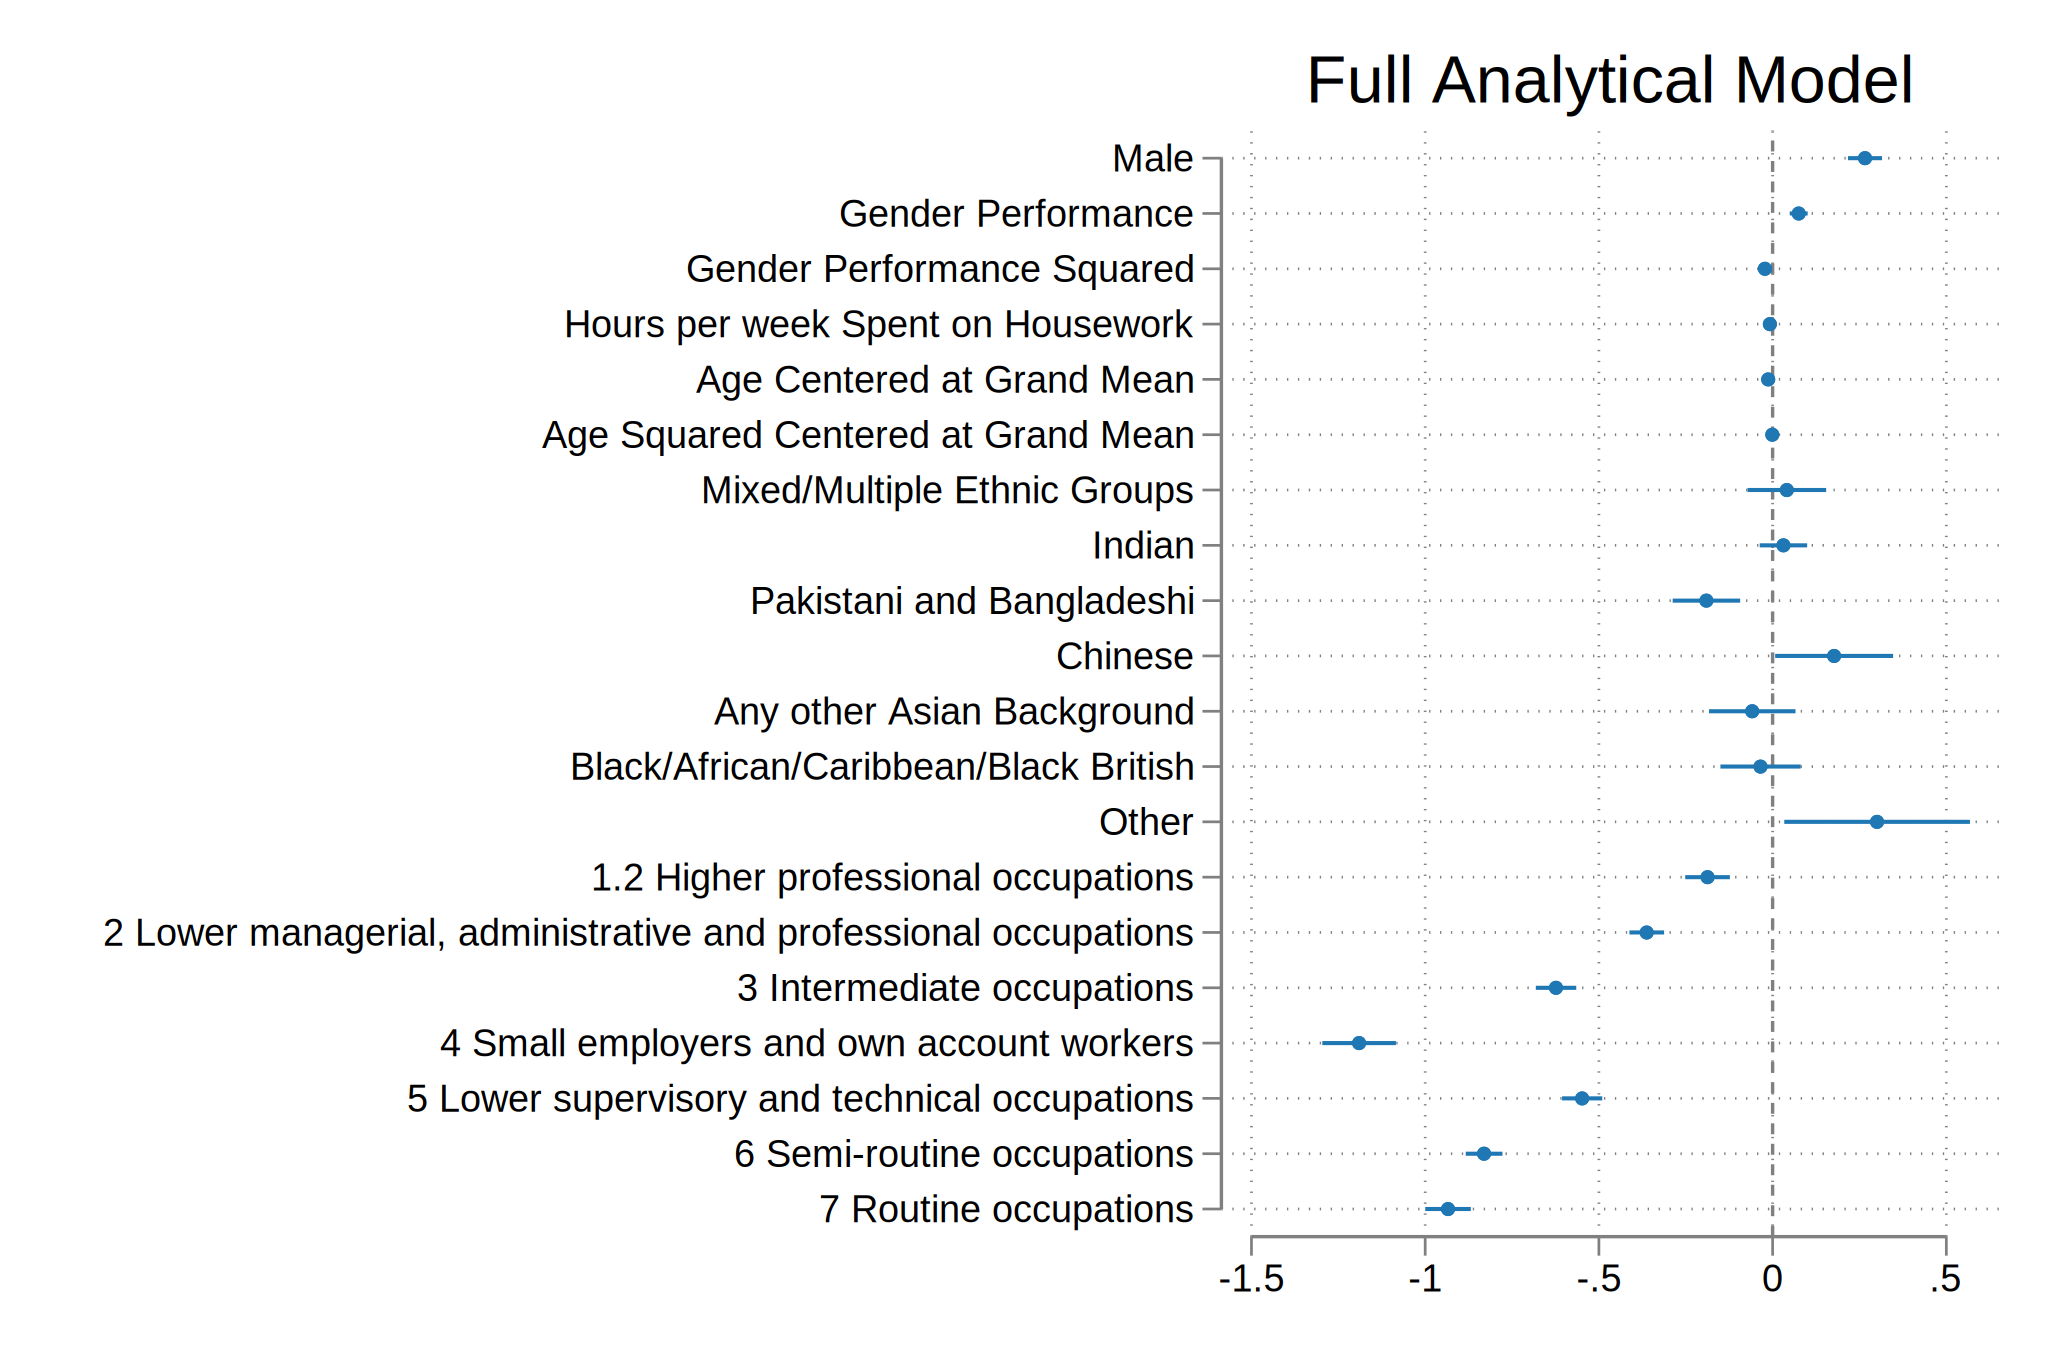

In [84]:
%%stata

svy: regress logincome i.sex c.gender_performance c.gender_performance_2 c.househours c.age_cgm c.age2_cgm i.ethnic i.nssec 

coefplot, drop(_cons) xline(0) title("Full Analytical Model")
graph export "coefplot.png", width(2000) replace



. 
. hist residuals, normal
(bin=40, start=-9.9879751, width=.30881041)

. 


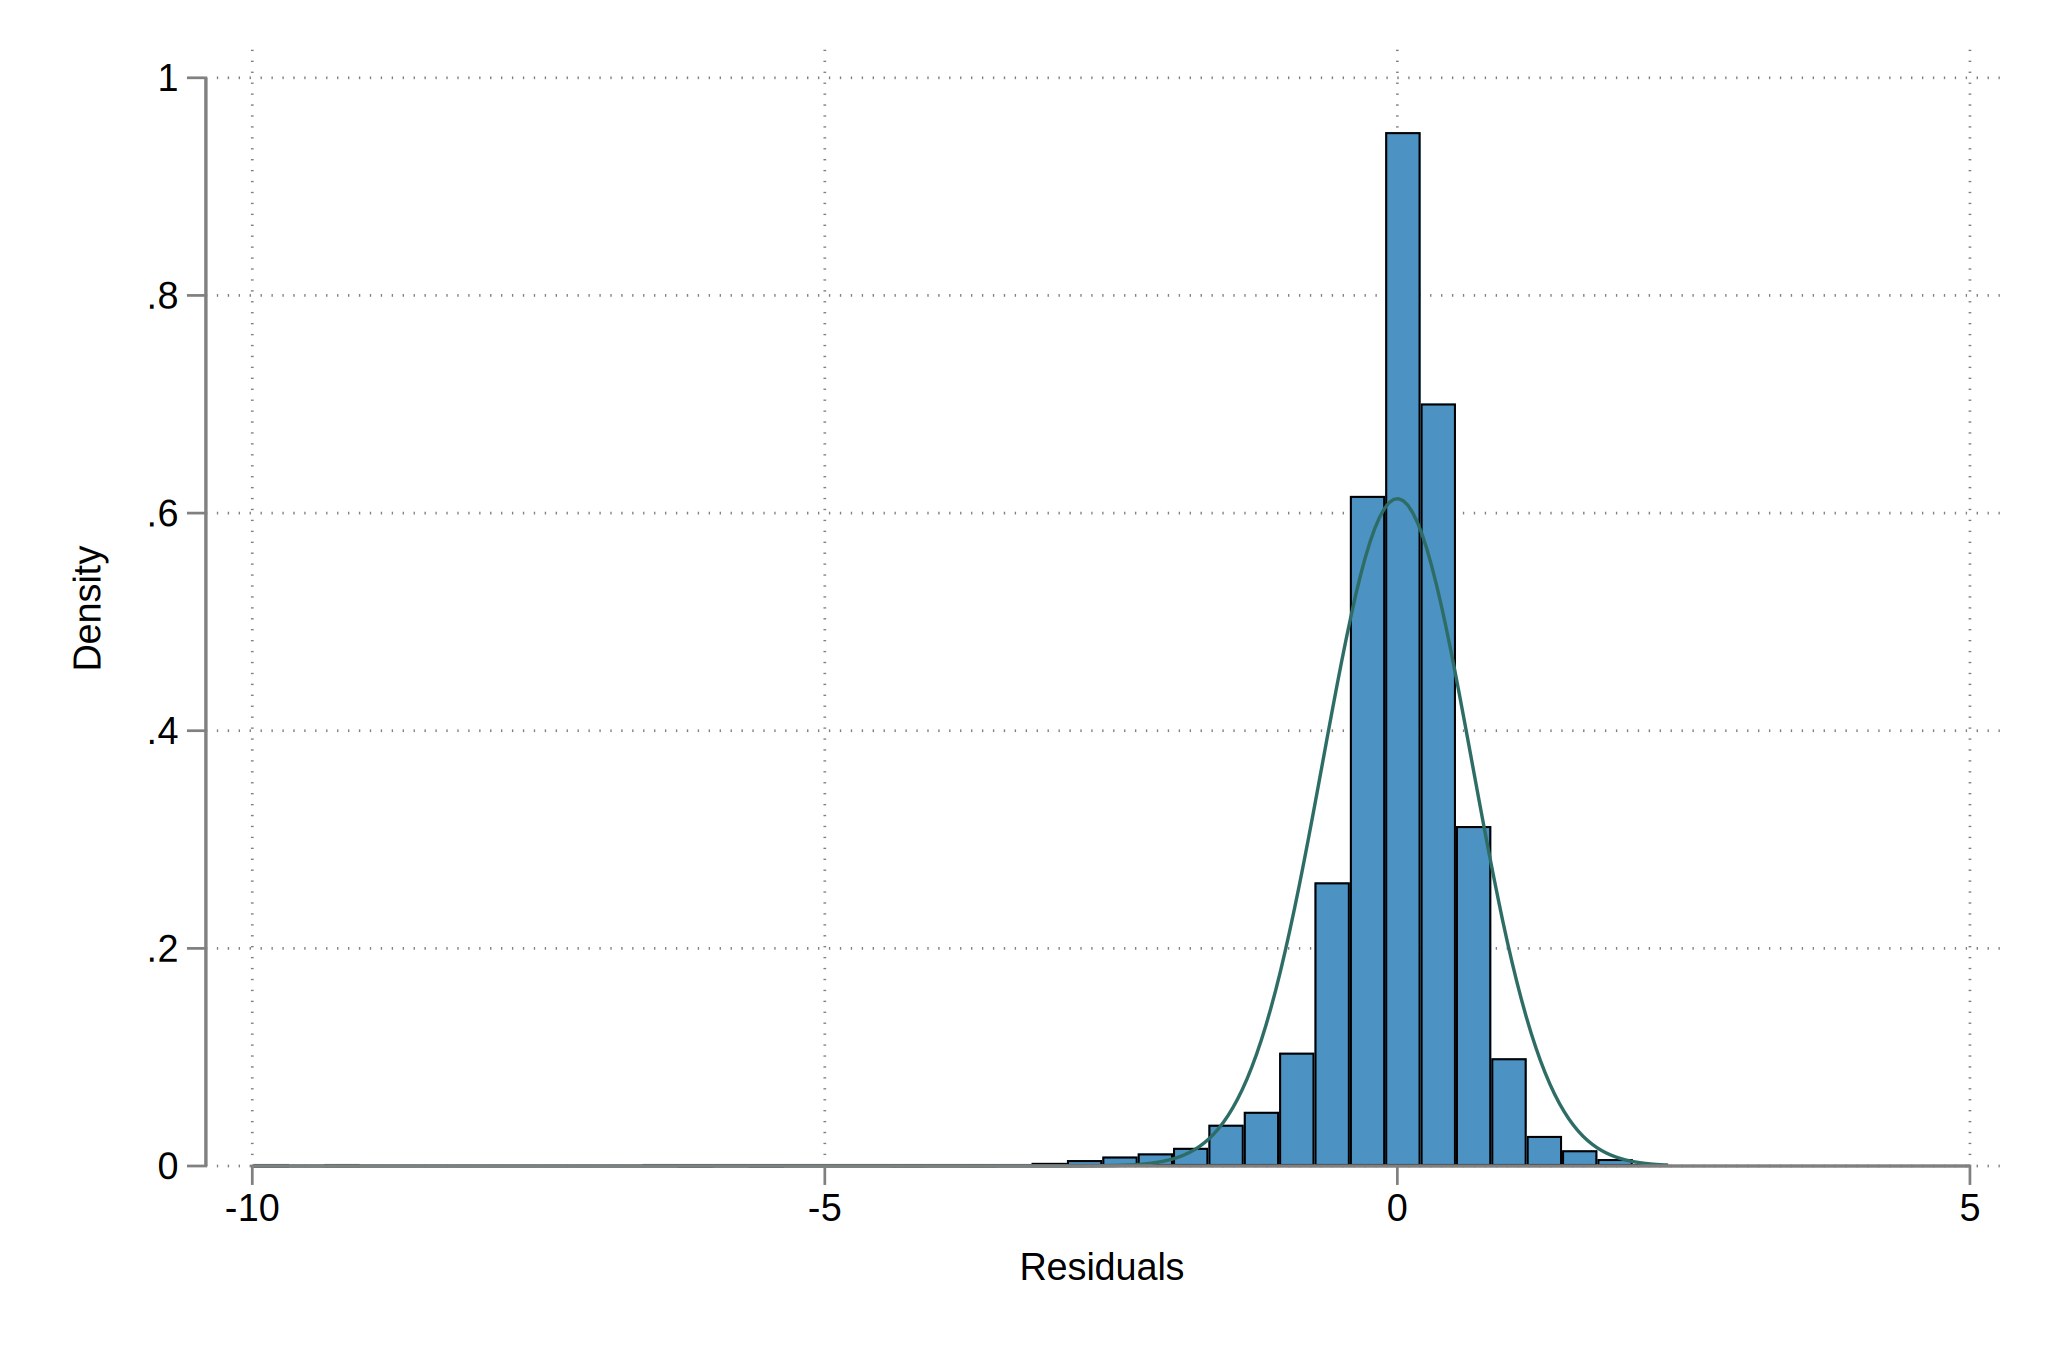

In [77]:
%%stata

hist residuals, normal

## Results

## Conclusions

## Notes

## Supplementary Materials

## References